# Candlestick Dark Cloud Cover

https://www.investopedia.com/terms/d/darkcloud.asp

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import talib

import warnings
warnings.filterwarnings("ignore")

# yahoo finance is used to fetch data 
import yfinance as yf
yf.pdr_override()

In [2]:
# input
symbol = 'AMD'
start = '2020-01-01'
end = '2021-10-11'

# Read data 
df = yf.download(symbol,start,end)

# View Columns
df.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-02,46.860001,49.250000,46.630001,49.099998,49.099998,80331100
2020-01-03,48.029999,49.389999,47.540001,48.599998,48.599998,73127400
2020-01-06,48.020000,48.860001,47.860001,48.389999,48.389999,47934900
2020-01-07,49.349998,49.389999,48.040001,48.250000,48.250000,58061400
2020-01-08,47.849998,48.299999,47.139999,47.830002,47.830002,53767000


## Candlestick with Dark Cloud Cover

In [3]:
from matplotlib import dates as mdates
import datetime as dt

dfc = df.copy()
dfc['VolumePositive'] = dfc['Open'] < dfc['Adj Close']
#dfc = dfc.dropna()
dfc = dfc.reset_index()
dfc['Date'] = pd.to_datetime(dfc['Date'])
dfc['Date'] = dfc['Date'].apply(mdates.date2num)
dfc.head()

,Date,Open,High,Low,Close,Adj Close,Volume,VolumePositive
0,737426.0,46.860001,49.250000,46.630001,49.099998,49.099998,80331100,True
1,737427.0,48.029999,49.389999,47.540001,48.599998,48.599998,73127400,True
2,737430.0,48.020000,48.860001,47.860001,48.389999,48.389999,47934900,True
3,737431.0,49.349998,49.389999,48.040001,48.250000,48.250000,58061400,False
4,737432.0,47.849998,48.299999,47.139999,47.830002,47.830002,53767000,False


Text(0, 0.5, 'Price')

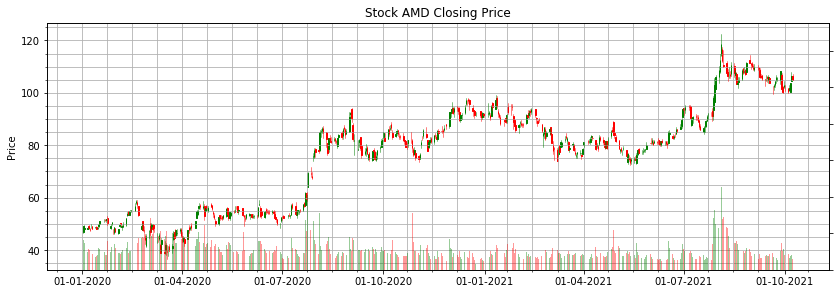

In [4]:
from mplfinance.original_flavor import candlestick_ohlc

fig = plt.figure(figsize=(14,10))
ax = plt.subplot(2, 1, 1)
candlestick_ohlc(ax,dfc.values, width=0.5, colorup='g', colordown='r', alpha=1.0)
ax.xaxis_date()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
ax.grid(True, which='both')
ax.minorticks_on()
axv = ax.twinx()
colors = dfc.VolumePositive.map({True: 'g', False: 'r'})
axv.bar(dfc.Date, dfc['Volume'], color=colors, alpha=0.4)
axv.axes.yaxis.set_ticklabels([])
axv.set_ylim(0, 3*df.Volume.max())
ax.set_title('Stock '+ symbol +' Closing Price')
ax.set_ylabel('Price')

In [5]:
Dark_Cloud_Cover = talib.CDLDARKCLOUDCOVER(df['Open'], df['High'], df['Low'], df['Close'], penetration=0)

Dark_Cloud_Cover = Dark_Cloud_Cover[Dark_Cloud_Cover != 0]

In [6]:
df['Dark_Cloud_Cover'] = talib.CDLDARKCLOUDCOVER(df['Open'], df['High'], df['Low'], df['Close'], penetration=0)

In [7]:
df.loc[df['Dark_Cloud_Cover'] !=0]

,Open,High,Low,Close,Adj Close,Volume,Dark_Cloud_Cover
Date,,,,,,,
2020-05-05,53.430000,53.509998,51.290001,52.189999,52.189999,56560500,-100
2020-05-12,56.209999,56.580002,53.750000,53.759998,53.759998,55631100,-100
2020-06-16,55.720001,56.070000,53.590000,54.459999,54.459999,50949700,-100
2020-07-21,57.810001,58.500000,56.320000,57.000000,57.000000,44741000,-100
2020-08-26,86.970001,87.720001,85.199997,86.019997,86.019997,47157300,-100
2020-09-22,78.360001,78.790001,75.269997,77.699997,77.699997,56044700,-100
2020-11-17,83.930000,84.809998,82.910004,83.360001,83.360001,29473500,-100
2021-01-08,95.980003,96.400002,93.269997,94.580002,94.580002,39816400,-100
2021-08-24,109.449997,109.610001,107.279999,107.650002,107.650002,51239300,-100


In [8]:
df['Adj Close'].loc[df['Dark_Cloud_Cover'] !=0]

Date
2020-05-05     52.189999
2020-05-12     53.759998
2020-06-16     54.459999
2020-07-21     57.000000
2020-08-26     86.019997
2020-09-22     77.699997
2020-11-17     83.360001
2021-01-08     94.580002
2021-08-24    107.650002
2021-08-30    111.320000
Name: Adj Close, dtype: float64

In [9]:
df['Adj Close'].loc[df['Dark_Cloud_Cover'] !=0].index

DatetimeIndex(['2020-05-05', '2020-05-12', '2020-06-16', '2020-07-21',
               '2020-08-26', '2020-09-22', '2020-11-17', '2021-01-08',
               '2021-08-24', '2021-08-30'],
              dtype='datetime64[ns]', name='Date', freq=None)

In [10]:
Dark_Cloud_Cover

Date
2020-05-05   -100
2020-05-12   -100
2020-06-16   -100
2020-07-21   -100
2020-08-26   -100
2020-09-22   -100
2020-11-17   -100
2021-01-08   -100
2021-08-24   -100
2021-08-30   -100
dtype: int32

In [11]:
Dark_Cloud_Cover.index

DatetimeIndex(['2020-05-05', '2020-05-12', '2020-06-16', '2020-07-21',
               '2020-08-26', '2020-09-22', '2020-11-17', '2021-01-08',
               '2021-08-24', '2021-08-30'],
              dtype='datetime64[ns]', name='Date', freq=None)

In [12]:
df

,Open,High,Low,Close,Adj Close,Volume,Dark_Cloud_Cover
Date,,,,,,,
2020-01-02,46.860001,49.250000,46.630001,49.099998,49.099998,80331100,0
2020-01-03,48.029999,49.389999,47.540001,48.599998,48.599998,73127400,0
2020-01-06,48.020000,48.860001,47.860001,48.389999,48.389999,47934900,0
2020-01-07,49.349998,49.389999,48.040001,48.250000,48.250000,58061400,0
2020-01-08,47.849998,48.299999,47.139999,47.830002,47.830002,53767000,0
...,...,...,...,...,...,...,...
2021-10-04,101.739998,101.849998,99.820000,100.339996,100.339996,41967100,0
2021-10-05,100.919998,102.870003,100.610001,101.809998,101.809998,31455200,0
2021-10-06,100.449997,103.720001,100.349998,103.639999,103.639999,39071700,0


Text(0, 0.5, 'Price')

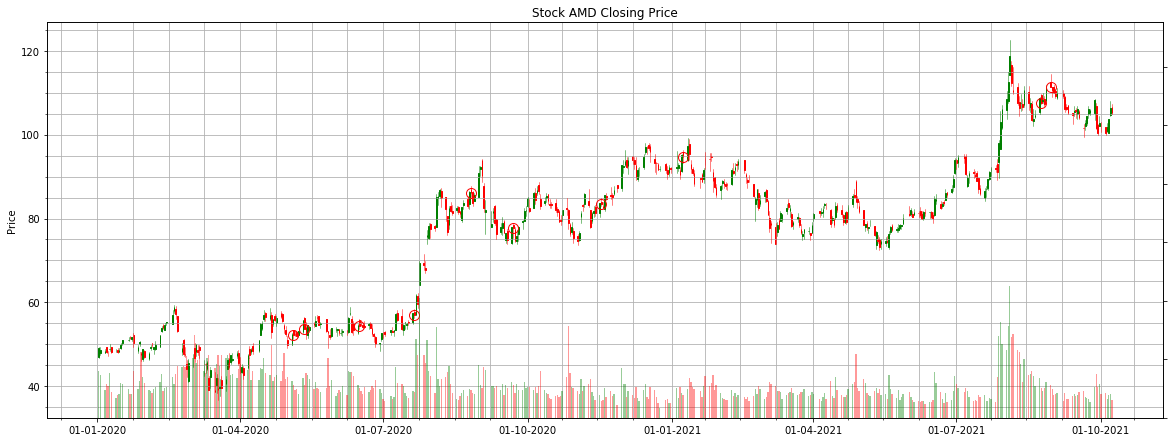

In [13]:
fig = plt.figure(figsize=(20,16))
ax = plt.subplot(2, 1, 1)
candlestick_ohlc(ax,dfc.values, width=0.5, colorup='g', colordown='r', alpha=1.0)
ax.xaxis_date()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
ax.grid(True, which='both')
ax.minorticks_on()
axv = ax.twinx()
ax.plot_date(df['Adj Close'].loc[df['Dark_Cloud_Cover'] !=0].index, df['Adj Close'].loc[df['Dark_Cloud_Cover'] !=0],
                'or', # marker style 'o', color 'g'
                fillstyle='none', # circle is not filled (with color)
                ms=10.0) 
colors = dfc.VolumePositive.map({True: 'g', False: 'r'})
axv.bar(dfc.Date, dfc['Volume'], color=colors, alpha=0.4)
axv.axes.yaxis.set_ticklabels([])
axv.set_ylim(0, 3*df.Volume.max())
ax.set_title('Stock '+ symbol +' Closing Price')
ax.set_ylabel('Price')

## Plot Certain dates

In [14]:
df = df['2021-08-01':'2021-09-01']
dfc = df.copy()
dfc['VolumePositive'] = dfc['Open'] < dfc['Adj Close']
#dfc = dfc.dropna()
dfc = dfc.reset_index()
dfc['Date'] = pd.to_datetime(dfc['Date'])
dfc['Date'] = dfc['Date'].apply(mdates.date2num)
dfc.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Dark_Cloud_Cover,VolumePositive
0,738004.0,105.930000,110.330002,103.830002,108.629997,108.629997,115581900,0,True
1,738005.0,108.150002,114.849998,107.660004,112.559998,112.559998,157723100,0,True
2,738006.0,114.360001,122.489998,114.160004,118.769997,118.769997,225368700,0,True
3,738007.0,116.629997,117.680000,111.589996,112.349998,112.349998,137860900,0,False
4,738008.0,110.550003,116.260002,109.699997,110.110001,110.110001,143792800,0,False


Text(0, 0.5, 'Price')

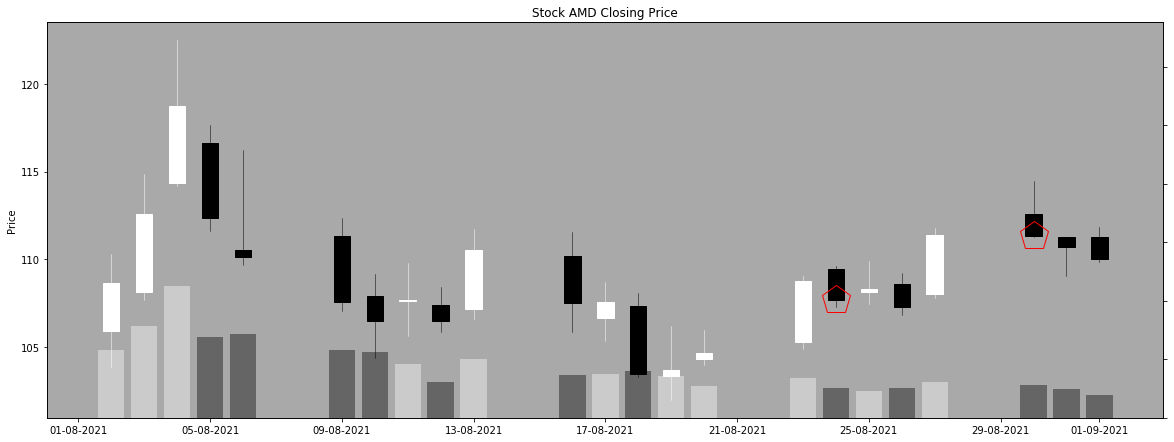

In [15]:
fig = plt.figure(figsize=(20,16))
ax = plt.subplot(2, 1, 1)
ax.set_facecolor('darkgrey')
candlestick_ohlc(ax,dfc.values, width=0.5, colorup='w', colordown='k', alpha=1.0)
ax.xaxis_date()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
#ax.grid(True, which='both')
#ax.minorticks_on()
axv = ax.twinx()
ax.plot_date(df['Adj Close'].loc[df['Dark_Cloud_Cover'] !=0].index, df['Adj Close'].loc[df['Dark_Cloud_Cover'] !=0],
                'pr', # marker style 'o', color 'g'
                fillstyle='none', # circle is not filled (with color)
                ms=30.0) 
colors = dfc.VolumePositive.map({True: 'w', False: 'k'})
axv.bar(dfc.Date, dfc['Volume'], color=colors, alpha=0.4)
axv.axes.yaxis.set_ticklabels([])
axv.set_ylim(0, 3*df.Volume.max())
ax.set_title('Stock '+ symbol +' Closing Price')
ax.set_ylabel('Price')

# Highlight Candlestick

Text(0, 0.5, 'Price')

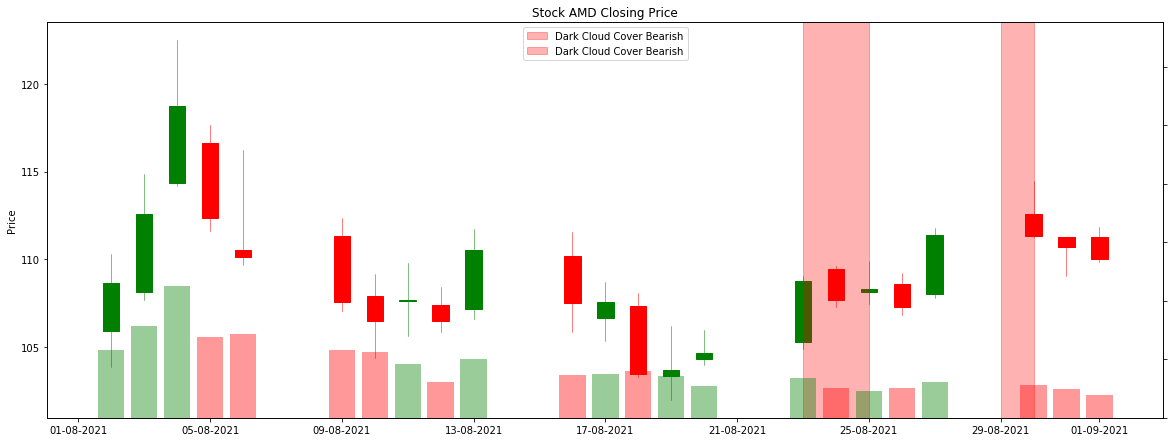

In [16]:
from matplotlib.dates import date2num
from datetime import datetime

fig = plt.figure(figsize=(20,16))
ax = plt.subplot(2, 1, 1)
candlestick_ohlc(ax,dfc.values, width=0.5, colorup='g', colordown='r', alpha=1.0)
ax.xaxis_date()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
#ax.grid(True, which='both')
#ax.minorticks_on()
axv = ax.twinx()
ax.axvspan(date2num(datetime(2021,8,23)), date2num(datetime(2021,8,25)), 
           label="Dark Cloud Cover Bearish",color="red", alpha=0.3)
ax.axvspan(date2num(datetime(2021,8,29)), date2num(datetime(2021,8,30)), 
           label="Dark Cloud Cover Bearish",color="red", alpha=0.3)
ax.legend(loc='upper center')
colors = dfc.VolumePositive.map({True: 'g', False: 'r'})
axv.bar(dfc.Date, dfc['Volume'], color=colors, alpha=0.4)
axv.axes.yaxis.set_ticklabels([])
axv.set_ylim(0, 3*df.Volume.max())
ax.set_title('Stock '+ symbol +' Closing Price')
ax.set_ylabel('Price')